<a href="https://colab.research.google.com/github/santhoshmc/machine-learning/blob/main/Football_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#mounting google drive

In [4]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


#Reading files and performing EDA

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
path = "/content/drive/MyDrive/Python/Datasets/Bundesliga_Results.csv"

In [44]:
df = pd.read_csv(path)
df.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season
0,D1,7/8/1993,Bayern Munich,Freiburg,3,1,H,NaN,NaN,NaN,1993-94
1,D1,7/8/1993,Dortmund,Karlsruhe,2,1,H,NaN,NaN,NaN,1993-94
2,D1,7/8/1993,Duisburg,Leverkusen,2,2,D,NaN,NaN,NaN,1993-94
3,D1,7/8/1993,FC Koln,Kaiserslautern,0,2,A,NaN,NaN,NaN,1993-94
4,D1,7/8/1993,Hamburg,Nurnberg,5,2,H,NaN,NaN,NaN,1993-94


In [45]:
df = df.drop(['Div','Date'],axis=1)

In [46]:
df.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season
0,Bayern Munich,Freiburg,3,1,H,NaN,NaN,NaN,1993-94
1,Dortmund,Karlsruhe,2,1,H,NaN,NaN,NaN,1993-94
2,Duisburg,Leverkusen,2,2,D,NaN,NaN,NaN,1993-94
3,FC Koln,Kaiserslautern,0,2,A,NaN,NaN,NaN,1993-94
4,Hamburg,Nurnberg,5,2,H,NaN,NaN,NaN,1993-94


In [10]:
HomeTeam = df["HomeTeam"]
AwayTeam = df["AwayTeam"]
print(HomeTeam)
print(AwayTeam)


0       Bayern Munich
1            Dortmund
2            Duisburg
3             FC Koln
4             Hamburg
            ...      
7650              NaN
7651       Leverkusen
7652            Mainz
7653              NaN
7654        Wolfsburg
Name: HomeTeam, Length: 7655, dtype: object
0             Freiburg
1            Karlsruhe
2           Leverkusen
3       Kaiserslautern
4             Nurnberg
             ...      
7650               NaN
7651          Hannover
7652               NaN
7653     Ein Frankfurt
7654           FC Koln
Name: AwayTeam, Length: 7655, dtype: object


In [11]:
home_away_team = pd.concat([HomeTeam,AwayTeam])

In [12]:
len(home_away_team.value_counts())

43

In [25]:
team_name = (home_away_team.value_counts()).index

In [26]:
matches_played = (home_away_team.value_counts()).values

In [33]:
plt.rcParams["figure.figsize"] = (10,30)

In [ ]:
#sns.barplot( x=team_name, y=matches_played)
sns.barplot( y=team_name, x=matches_played)

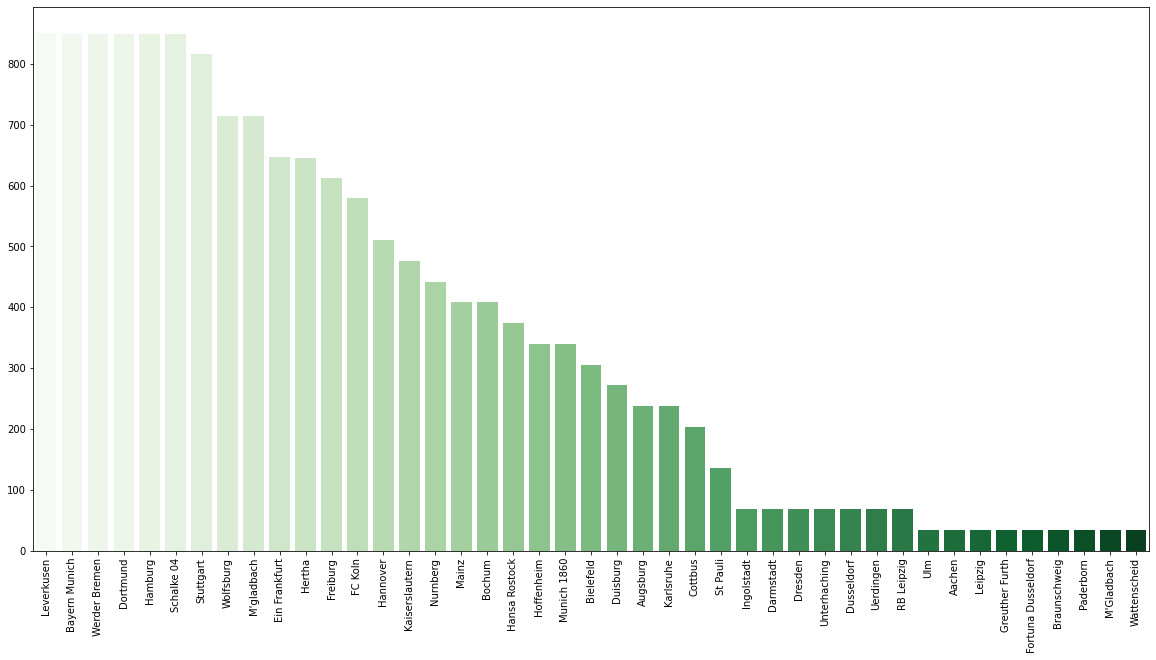

In [42]:
plt.rcParams["figure.figsize"] = (20,10)
sns.barplot( x=team_name, y=matches_played, palette ="Greens"
            )
plt.xticks(rotation=90)
plt.show()

In [47]:
df.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season
0,Bayern Munich,Freiburg,3,1,H,NaN,NaN,NaN,1993-94
1,Dortmund,Karlsruhe,2,1,H,NaN,NaN,NaN,1993-94
2,Duisburg,Leverkusen,2,2,D,NaN,NaN,NaN,1993-94
3,FC Koln,Kaiserslautern,0,2,A,NaN,NaN,NaN,1993-94
4,Hamburg,Nurnberg,5,2,H,NaN,NaN,NaN,1993-94


In [50]:
 df["FTR"].value_counts()

H    3591
A    2100
D    1964
Name: FTR, dtype: int64

In [54]:
 x = df["FTR"].value_counts().index


In [55]:
 y = df["FTR"].value_counts().values

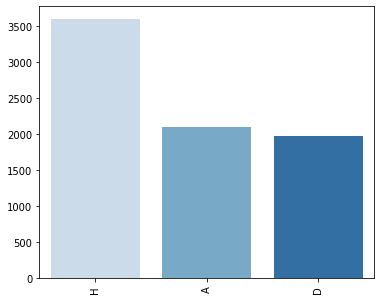

In [56]:
plt.rcParams["figure.figsize"] = (6,5)
sns.barplot( x=x, y=y, palette ="Blues")
plt.xticks(rotation=90)
plt.show()

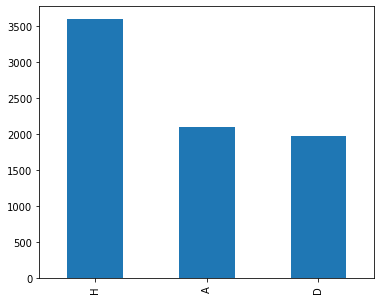

In [60]:
df["FTR"].value_counts().plot(kind= 'bar')
plt.show()